# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Training and testing the Model](#section4)<br>
    - 4.1 [Splitting data into training and test datasets](#section401)<br>
    - 4.2 [Linear regression in scikit-learn](#section402)<br>
    - 4.3 [Interpreting Model Coefficients](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
    
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
6. [Handling Categorical Features](#section6)<br>

<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [4]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head(100)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21.0,22.0,15.5
99,289.7,42.3,51.2,25.4


In [5]:
data.shape

(200, 4)

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

<Axes: xlabel='newspaper', ylabel='Density'>

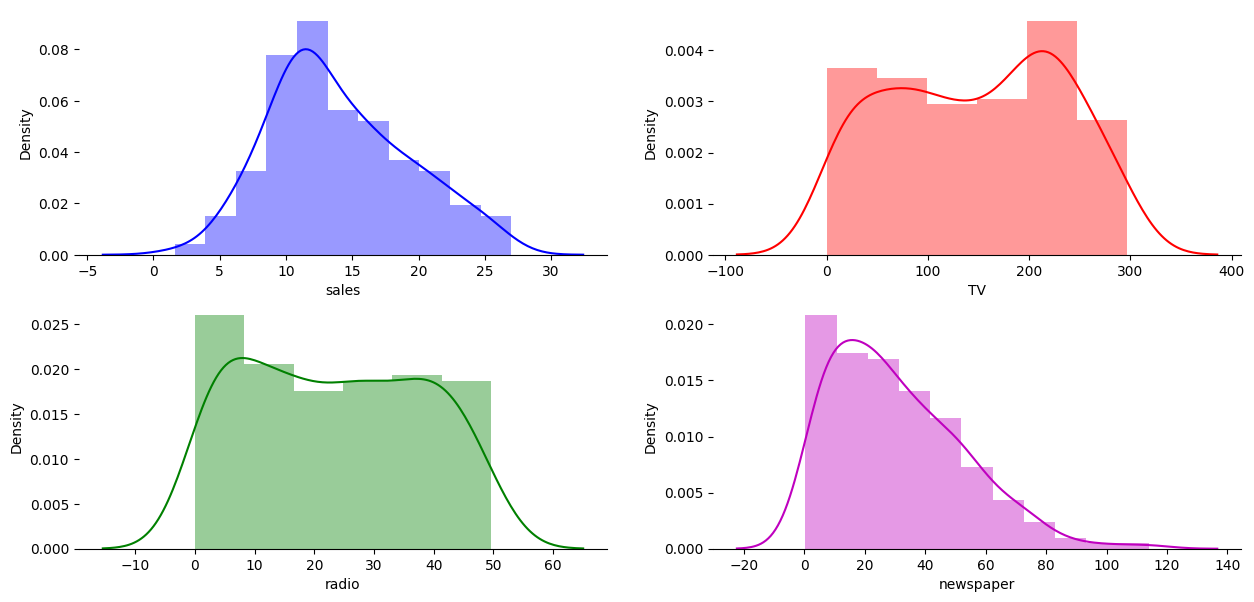

In [11]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

### Is there a relationship between sales and spend various advertising channels?

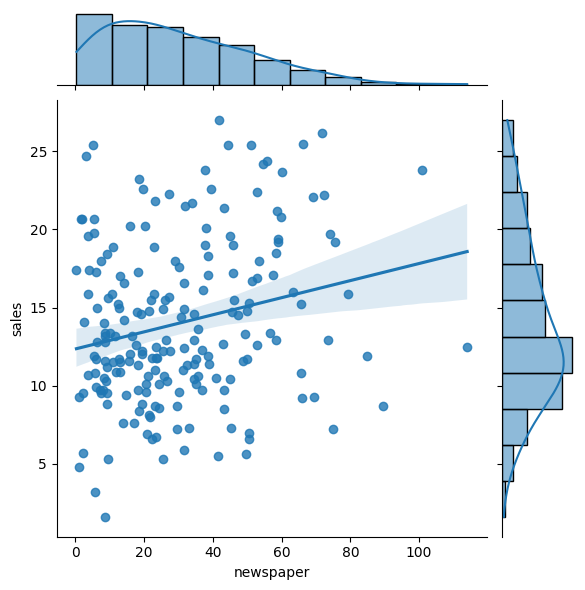

In [15]:
JG1 = sns.jointplot(x="newspaper", y="sales", data=data, kind='reg')

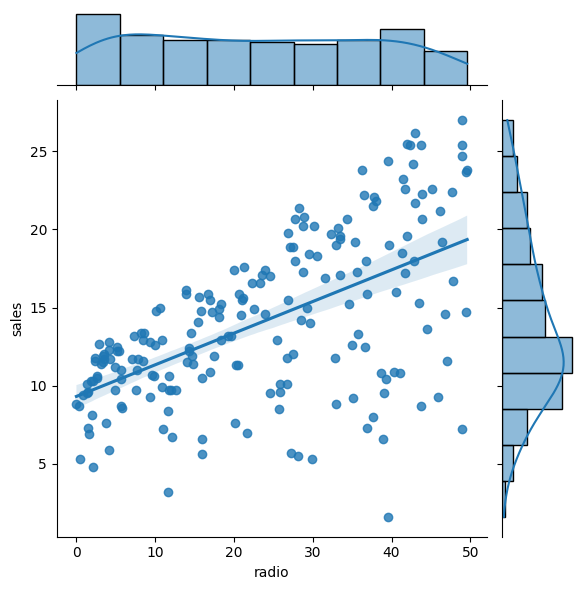

In [16]:
JG2 = sns.jointplot(x="radio", y="sales", data=data, kind='reg')

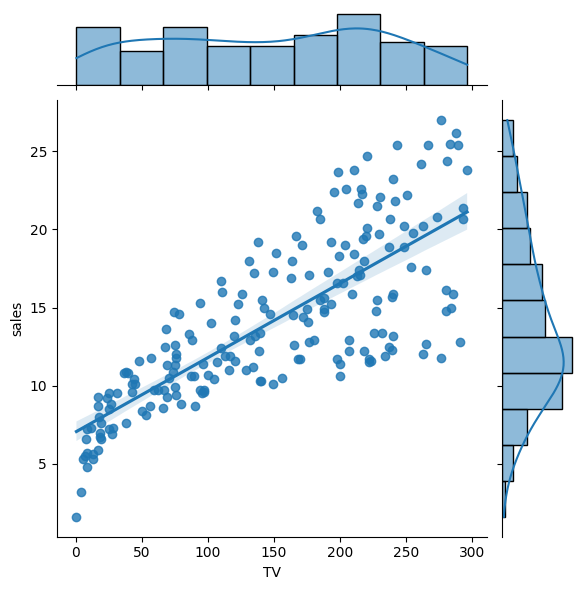

In [17]:
JG3 = sns.jointplot(x="TV", y="sales", data=data, kind='reg')

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlaed where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

In [ ]:
sns.pairplot(data, height = 2, aspect = 1.5)

In [ ]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(round(data.corr(),2),annot=True)
plt.show()

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


<a id=section4></a>

## 4. Training and Testing the Model

<a id=section401></a>

### 4.1 Splitting data into training and test datasets. "WHY?"

In [ ]:
features = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
target = ['sales']                                     # Define the target variable

In [ ]:
data.head()

In [ ]:
data[features]

In [ ]:
data[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.05, random_state=5000)

In [ ]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

<a id=section402></a>

### 4.2 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluate - Calculate RMSE and R square

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    ll_model.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    r2_test = metrics.r2_score(y_test, y_pred_test)```

In [ ]:
#Instantiating the model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [ ]:
lr_model.fit(X_train, y_train)

<a id=section403></a>

### 4.3 Interpreting Model Coefficients

In [ ]:
print('Intercept:',lr_model.intercept_)          # print the intercept 
print('Coefficients:',lr_model.coef_)  

In [ ]:
X_train.columns

In [ ]:
(lr_model.coef_).T

In [ ]:
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

__y = 2.9 + 0.0468 `*` TV + 0.1785 `*` radio + 0.00258 `*` newspaper__

How do we interpret the TV coefficient (0.0468)
- A "unit" increase in TV ad spending is **associated with** a _"0.0468_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of ~0.0468 * 1000 = 47 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

<a id=section404></a>

### 4.4 Using the Model for Prediction

In [ ]:
y_pred_train = lr_model.predict(X_train)  

In [ ]:
y_pred_train                                                         # make predictions on the training set

In [ ]:
y_pred_test = lr_model.predict(X_test)                                  # make predictions on the testing set

In [ ]:
y_pred_test

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [ ]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [ ]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

In [ ]:
data['sales'].mean()

In [ ]:
RMSE_test/data['sales'].mean()

Comparing these metrics:
- __RMSE__ is more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section6></a>

## 6.  Handling Categorical Features

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban** :

In [ ]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'

data.head(50)

# Some EDA of categorical variable

In [ ]:
data.groupby(['Area'])['sales'].mean().sort_values(ascending=False).plot(kind = 'bar')

In [ ]:
a = sns.scatterplot(x="TV", y="sales", data=data, hue='Area')

In [ ]:
a = sns.scatterplot(x="Area", y="sales", data=data)

In [ ]:
#data.to_csv("data_with_area.csv")

We want to represent Area numerically, but we can't simply code it as:<br/>
- 0 = rural,<br/>
- 1 = suburban,<br/>
- 2 = urban<br/>
Because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category.<br/> Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable to represent the categories numerically (such as 1, 2, 3, 4, 5).<br/>

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [ ]:
features = ['TV', 'radio', 'newspaper', 'Area']
cat_cols = ['Area']                                           # Define the categorical variables

In [ ]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_with_dummies.head()

Here is how we interpret the coding:
- **rural** is coded as  Area_suburban = 0  and  Area_urban = 0
- **suburban** is coded as  Area_suburban = 1  and  Area_urban = 0
- **urban** is coded as  Area_suburban = 0  and  Area_urban = 1

If this sounds confusing, think in general terms that why we need only __k-1 dummy variables__ if we have a categorical feature with __k "levels"__.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model.

In [ ]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']             # create a Python list of feature names
X = data_with_dummies[feature_cols]  
y = data_with_dummies.sales
lr_model_cat = LinearRegression()

In [ ]:
lr_model_cat.fit(X,y)

In [ ]:
y_pred_cat = lr_model_cat.predict(X)  

In [ ]:
pd.DataFrame((lr_model_cat.coef_).T,index=X.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

In [ ]:
print('Intercept:',lr_model_cat.intercept_)

__y =  2.92 + 0.045802 `*` TV + 0.1876 `*` radio - 0.001018 `*` newspaper - 0.117890 `*` Area_suburban + 0.2535 `*` Area_urban__<br/>
How do we interpret the coefficients?<br/>
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 0.1178 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 0.2535 widgets (as compared to rural).

ORIGINAL EQUATION

__y = 2.9 + 0.0468 `*` TV + 0.1785 `*` radio + 0.00258 `*` newspaper__

In [ ]:
data_with_dummies['predictions'] = y_pred_cat

In [ ]:
data_with_dummies

In [ ]:
data_with_dummies['error'] = data_with_dummies['sales'] - data_with_dummies['predictions']

In [ ]:
data_with_dummies['error'].describe()

In [ ]:
data_with_dummies.plot.scatter(x='sales', y='predictions',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

In [ ]:
sns.distplot(data_with_dummies['error'])

In [ ]:
data_with_dummies[data_with_dummies['error']<-4]

In [ ]:
data_with_dummies.plot.scatter(x='sales', y='error',\
                      figsize=(8,5), grid=True, title='Actual vs Predicted')

In [ ]:
data_with_dummies.to_csv('data_with_predictions.csv')

<a id=section8></a>